In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import xgboost as xgb

In [2]:
data = fetch_california_housing()
X = data['data']
Y = data['target']

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
performances = {el: 0 for el in ['xgboost', 'cnn', 'rf', 'adaboost']}

XGBoost Regressor

In [4]:
def xgb_regressor_mse(n_estimators, x_train, y_train, x_test, y_test):
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    return mean_squared_error(preds, y_test)

In [5]:
scores = []
for est in [50, 100, 200, 250, 500, 1000]:
    scores.append(xgb_regressor_mse(est, x_train, y_train, x_test, y_test))

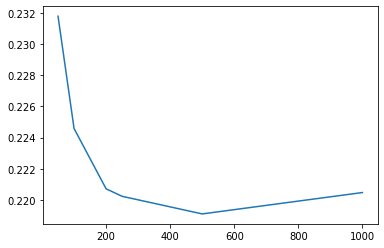

In [6]:
estimators = [50, 100, 200, 250, 500, 1000]
plt.plot(estimators, scores)
plt.show()

In [7]:
print('Best MSE:', min(scores), '(' + str(estimators[scores.index(min(scores))]) + ' estimators)')
performances['xgboost'] = min(scores)

Best MSE: 0.21910645998625627 (500 estimators)


Artificial Neural Networks (CNN)

In [8]:
nn_x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
nn_x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [9]:
model = keras.models.Sequential([
    layers.Conv1D(filters=20, kernel_size=4, activation='elu', padding='same', input_shape=(nn_x_train.shape[1], nn_x_train.shape[2])),
    layers.Flatten(),
    layers.Dropout(0),
    layers.Dense(units=8, activation='elu'),
    layers.Dense(units=1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(nn_x_train, y_train, epochs=200, validation_data=(nn_x_test, y_test), shuffle=False)

Epoch 1/200
516/516 [==============================] - 3s 4ms/step - loss: 186.4586 - val_loss: 4.4017
Epoch 2/200
516/516 [==============================] - 2s 3ms/step - loss: 4.2915 - val_loss: 1.6613
Epoch 3/200
516/516 [==============================] - 2s 3ms/step - loss: 1.8704 - val_loss: 1.4396
Epoch 4/200
516/516 [==============================] - 2s 5ms/step - loss: 1.6484 - val_loss: 1.3093
Epoch 5/200
516/516 [==============================] - 2s 4ms/step - loss: 1.7183 - val_loss: 1.5113
Epoch 6/200
516/516 [==============================] - 1s 3ms/step - loss: 3.4196 - val_loss: 6.8763
Epoch 7/200
516/516 [==============================] - 2s 3ms/step - loss: 4.2515 - val_loss: 13.5736
Epoch 8/200
516/516 [==============================] - 2s 3ms/step - loss: 3.5762 - val_loss: 6.1079
Epoch 9/200
516/516 [==============================] - 2s 3ms/step - loss: 3.8796 - val_loss: 10.7226
Epoch 10/200
516/516 [==============================] - 2s 3ms/step - loss: 2.9787 - va

516/516 [==============================] - 1s 3ms/step - loss: 0.5150 - val_loss: 0.4969
Epoch 82/200
516/516 [==============================] - 2s 3ms/step - loss: 0.5131 - val_loss: 0.4897
Epoch 83/200
516/516 [==============================] - 1s 3ms/step - loss: 0.5099 - val_loss: 0.4896
Epoch 84/200
516/516 [==============================] - 1s 3ms/step - loss: 0.5106 - val_loss: 0.5465
Epoch 85/200
516/516 [==============================] - 1s 3ms/step - loss: 0.5069 - val_loss: 0.5692
Epoch 86/200
516/516 [==============================] - 1s 3ms/step - loss: 0.5111 - val_loss: 0.5132
Epoch 87/200
516/516 [==============================] - 2s 3ms/step - loss: 0.4999 - val_loss: 0.5421
Epoch 88/200
516/516 [==============================] - 2s 3ms/step - loss: 0.5012 - val_loss: 0.4812
Epoch 89/200
516/516 [==============================] - 2s 3ms/step - loss: 0.5040 - val_loss: 0.4805
Epoch 90/200
516/516 [==============================] - 1s 3ms/step - loss: 0.4960 - val_loss: 

Epoch 161/200
516/516 [==============================] - 1s 3ms/step - loss: 0.4574 - val_loss: 0.4648
Epoch 162/200
516/516 [==============================] - 1s 3ms/step - loss: 0.4576 - val_loss: 0.4655
Epoch 163/200
516/516 [==============================] - 1s 3ms/step - loss: 0.4564 - val_loss: 0.4691
Epoch 164/200
516/516 [==============================] - 1s 3ms/step - loss: 0.4565 - val_loss: 0.4649
Epoch 165/200
516/516 [==============================] - 2s 3ms/step - loss: 0.4561 - val_loss: 0.4714
Epoch 166/200
516/516 [==============================] - 1s 3ms/step - loss: 0.4547 - val_loss: 0.4675
Epoch 167/200
516/516 [==============================] - 1s 3ms/step - loss: 0.4543 - val_loss: 0.4685
Epoch 168/200
516/516 [==============================] - 1s 3ms/step - loss: 0.4539 - val_loss: 0.4644
Epoch 169/200
516/516 [==============================] - 2s 3ms/step - loss: 0.4537 - val_loss: 0.4665
Epoch 170/200
516/516 [==============================] - 2s 3ms/step - lo

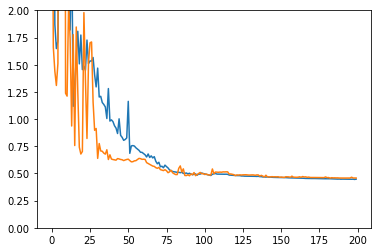

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
ax = plt.gca()
ax.set_ylim([0, 2])
plt.show()

In [11]:
print('MSE:', history.history['val_loss'][-1])
performances['cnn'] = history.history['val_loss'][-1]

MSE: 0.4577863812446594


Random Forest Regressor

In [12]:
def rf_regressor_mse(n_estimators, x_train, y_train, x_test, y_test):
    rf_model = RandomForestRegressor(n_estimators=n_estimators)
    rf_model.fit(x_train, y_train)
    rf_pred = rf_model.predict(x_test)
    return mean_squared_error(rf_pred, y_test)

In [13]:
rf_scores = []
for est in [20, 50, 100, 150, 200, 250, 500]:
    rf_scores.append(rf_regressor_mse(est, x_train, y_train, x_test, y_test))

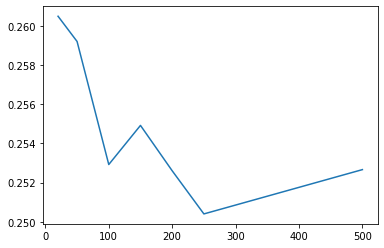

In [14]:
rf_estimators = [20, 50, 100, 150, 200, 250, 500]
plt.plot(rf_estimators, rf_scores)
plt.show()

In [15]:
print('Best MSE:', min(rf_scores), '(' + str(rf_estimators[rf_scores.index(min(rf_scores))]) + ' estimators)')
performances['rf'] = min(rf_scores)

Best MSE: 0.25039605957849626 (250 estimators)


AdaBoost Regressor (with Decision Tree Regressor)

In [16]:
def adaboost_regressor_mse(n_estimators, max_depth, x_train, y_train, x_test, y_test):
    dt_regr = DecisionTreeRegressor(max_depth=max_depth)
    regr = AdaBoostRegressor(dt_regr, n_estimators=n_estimators, random_state=42, loss='square')
    regr.fit(x_train, y_train)
    regr_pred = regr.predict(x_test)
    return mean_squared_error(regr_pred, y_test)

In [17]:
depths = [i for i in range(1, 8)]
regr_scores = {el: [] for el in depths}
for est in [1, 2, 5, 7, 10, 15, 20, 25, 50, 100, 250, 500]:
    for d in depths:
        regr_scores[d].append(adaboost_regressor_mse(est, d, x_train, y_train, x_test, y_test))

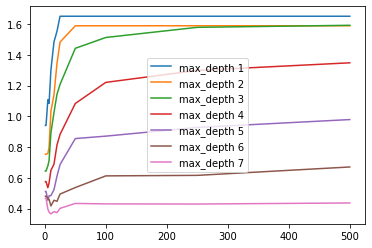

In [18]:
regr_estimators = [1, 2, 5, 7, 10, 15, 20, 25, 50, 100, 250, 500]
for d in depths:
    plt.plot(regr_estimators, regr_scores[d], label='max_depth ' + str(d))
plt.legend()
plt.show()

In [19]:
def find_best_params(scores, estimators):
    min_mse = scores[list(scores.keys())[0]][0]
    min_depth = list(scores.keys())[0]
    min_estimator = estimators[0]
    for key in scores.keys():
        curr_min = min(scores[key])
        if curr_min < min_mse:
            min_mse = curr_min
            min_depth = key
            min_estimator = estimators[scores[key].index(curr_min)]
    return min_mse, min_depth, min_estimator

In [20]:
min_mse, min_depth, min_estimator = find_best_params(regr_scores, regr_estimators)
print('Best MSE:', min_mse, '(' + str(min_estimator) + ' estimators, depth of ' + str(min_depth) + ')')
performances['adaboost'] = min_mse

Best MSE: 0.3654291699286652 (10 estimators, depth of 7)


Results Plotting

In [21]:
def plot_performances(perfs, title=''):
    labels = list(perfs.keys())
    res = []
    for key in labels:
        res.append(perfs[key])
    
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.bar(labels, res)
    ax.set_title(title)
    plt.show()

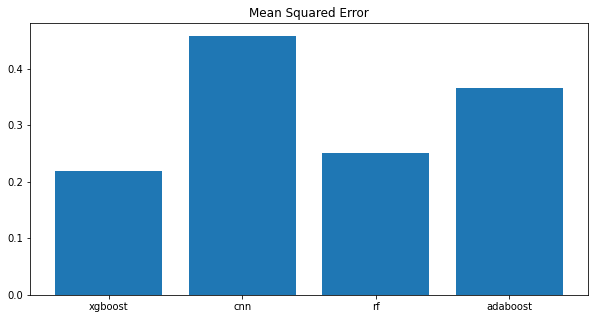

In [22]:
plot_performances(performances, 'Mean Squared Error')